<a href="https://colab.research.google.com/github/TolaniSilas/student_score_prediction/blob/main/gripregression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Import the necessary libraries and modules.
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import SGDRegressor, LinearRegression
from sklearn.model_selection import train_test_split, RandomizedSearchCV, KFold
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, accuracy_score
from scipy.stats import loguniform

In [ ]:
student_data = pd.read_csv("/content/drive/MyDrive/Datasets/student_scores_data.csv")

# Print out few rows of the student data.
print(student_data.head())

# Check for missing values.
print(student_data.isna().sum())

# Print the info of the dataframe.
print(student_data.info())

# The size of the data.
print(f"\nThe size of the student data is {student_data.size} data points.")

# The shape of the data.
print(f"\nThe data has {student_data.shape[0]} rows and {student_data.shape[1]} columns.")



   Hours  Scores
0    2.5      21
1    5.1      47
2    3.2      27
3    8.5      75
4    3.5      30
Hours     0
Scores    0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes
None

The size of the student data is 50 data points.

The data has 25 rows and 2 columns.


Text(0, 0.5, 'Percentage of Scores')

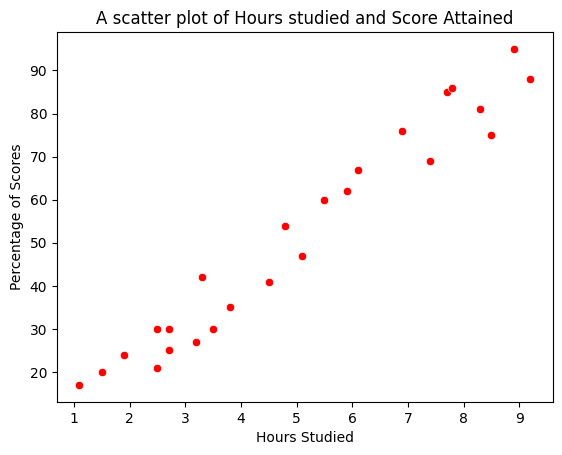

In [ ]:
# Plot the distribution of the dataset.
sns.scatterplot(data=student_data, y='Scores', x="Hours", c="r")
plt.title("A scatter plot of Hours studied and Score Attained")
plt.xlabel("Hours Studied")
plt.ylabel("Percentage of Scores")

<Axes: xlabel='Hours', ylabel='Count'>

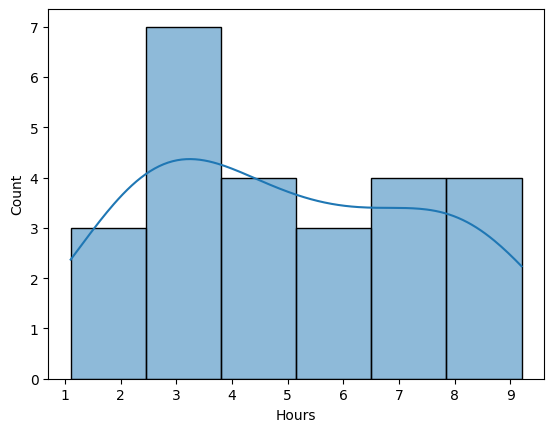

In [ ]:
# Check the distribution of the feature variable.
sns.histplot(data=student_data, x="Hours", kde=True)

<Axes: xlabel='Hours'>

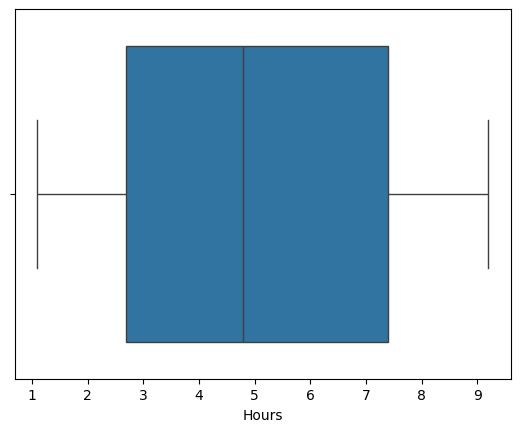

In [ ]:
sns.boxplot(data=student_data, x="Hours")

<Axes: xlabel='Scores', ylabel='Count'>

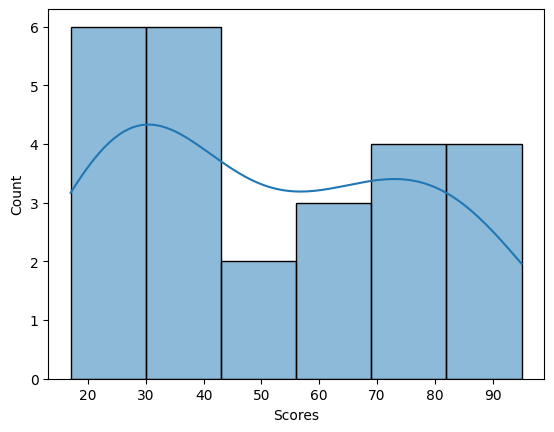

In [ ]:
# Checking the distribution of the target(outcome).
sns.histplot(data=student_data, x="Scores", kde=True)

<Axes: xlabel='Scores'>

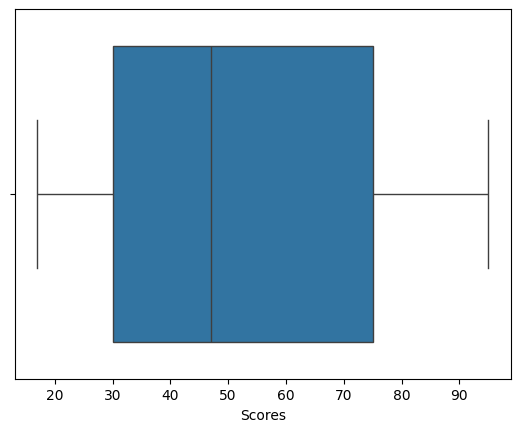

In [ ]:
sns.boxplot(data=student_data, x="Scores")

In [ ]:
# Split the data into feature variable and target(outcome).
X = student_data[["Hours"]]
y = student_data["Scores"]

# Split the dataset into training and testing sets.
X_train, X_test, y_train, y_test =  train_test_split(X, y, test_size=5, random_state = 2024)

# Scale the train and test feature variable.
scaler = StandardScaler()
scaled_train = scaler.fit_transform(X_train)
scaled_test = scaler.transform(X_test)


In [ ]:
# # Instantiate the SGD Regressor class.
# sdg_reg = SGDRegressor(max_iter=1500, verbose=3, random_state=2024)
# sdg_reg.fit(scaled_train, y_train)

param_dist = {
    'alpha': loguniform(1e-5, 1e2),
    'l1_ratio': [0.1, 0.3, 0.5, 0.7, 0.9],
    'penalty': ['l1', 'l2', 'elasticnet'],
    'max_iter': [1000, 2000, 3000],
}

# Create SGDRegressor
sgd_reg = SGDRegressor(random_state = 2024)

# Create RandomizedSearchCV
random_search = RandomizedSearchCV(sgd_reg, param_distributions=param_dist, n_iter=10, scoring='neg_mean_squared_error', cv=5, random_state=42)

# Fit the model
random_search.fit(scaled_train, y_train)

# Print the best parameters and best score.
print("Best hyperparameters:", random_search.best_params_)
print("Best Score:", random_search.best_score_)

# Get the best model.
best_sgd_model = random_search.best_estimator_


# Print the coefficients and intercept
print(f"\nCoefficients: { best_sgd_model.coef_}.")
print(f"Intercept: {best_sgd_model.intercept_}.")

# Evaluate on the train set
train_pred = random_search.predict(scaled_train)

# Evaluate on the test set
y_pred = random_search.predict(scaled_test)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error on Test Set:", mse)

mse = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error on Test Set:", mse)


# Print the coefficients and intercept
print(f"\nCoefficients: { best_sgd_model.coef_}.")
print(f"Intercept: {best_sgd_model.intercept_}.")





# # Instantiate the LinearRegression class.
# lin_reg = LinearRegress

Best hyperparameters: {'alpha': 0.16136341713591323, 'l1_ratio': 0.5, 'max_iter': 2000, 'penalty': 'l1'}
Best Score: -32.83992082647259

Coefficients: [22.27660716].
Intercept: [48.3210379].
Mean Squared Error on Test Set: 52.831248677200776
Mean Absolute Error on Test Set: 6.948399005011163

Coefficients: [22.27660716].
Intercept: [48.3210379].


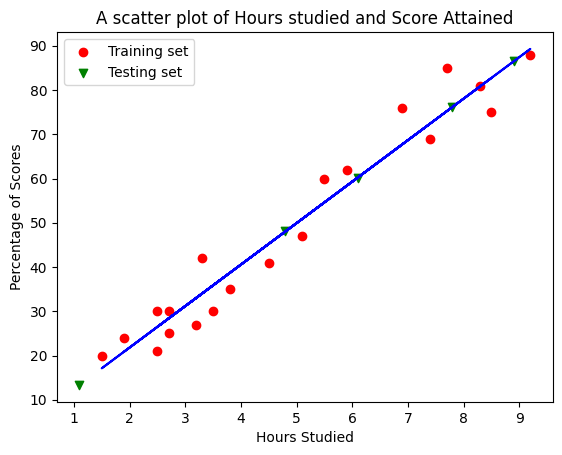

In [ ]:
plt.scatter(X_train, y_train, marker='o', c='red', label='Training set')
plt.scatter(X_test, y_pred, marker='v', c='green', label='Testing set')
plt.plot(X_train, train_pred, c='blue')
plt.title("A scatter plot of Hours studied and Score Attained")
plt.xlabel("Hours Studied")
plt.ylabel("Percentage of Scores")
plt.legend()


0.925850508240841

0.9259870503109651


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but SGDRegressor was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but SGDRegressor was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but SGDRegressor was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but SGDRegressor was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but SGDRegressor was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but SGDRegressor was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/di

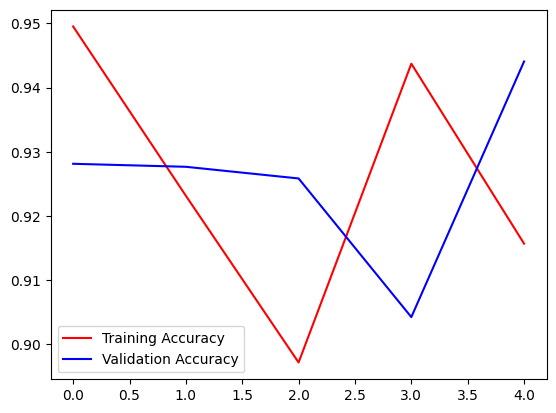

In [ ]:
# Scale the train and test feature variable.
scaler = StandardScaler()
scaled_train = scaler.fit_transform(X)



# Create empty lists for train and test scores.
train_scores, val_scores = [], []

# Divide the dataset into 5 folds.
n_splits = 5
kf = KFold(n_splits=n_splits, shuffle=True, random_state=2024)


for fold, (train_index, val_index) in enumerate(kf.split(X, y)):
    X_train, X_val = X.iloc[train_index], X.iloc[val_index]
    y_train, y_val = y.iloc[train_index], y.iloc[val_index]

    # Scale the features for training and validation sets
    X_train_scaled = scaler.fit_transform(X_train)
    X_val_scaled = scaler.transform(X_val)


    # Instantiate and train your model (SGDRegressor in this case)

     # Make predictions on the training set.
    train_pred = best_sgd_model.predict(X_train)

    # Evaluate the train accuracy score.
    train_score = best_sgd_model.score(X_train_scaled, y_train)
    train_scores.append(train_score)


    # Make predictions on the validation set.
    val_pred = best_sgd_model.predict(X_val)

    # Evaluate the validation accuracy score.
    val_score = best_sgd_model.score(X_val_scaled, y_val)
    val_scores.append(val_score)


print(f"\n{np.mean(train_scores)}")
print(f"\n{np.mean(val_scores)}")

In [ ]:
def predict_score(X_input):

    scaled_input = scaler.

Norm: 9.66, NNZs: 1, Bias: 1.857673, T: 400, Avg. loss: 14.351521
-- Epoch 10
Norm: 9.66, NNZs: 1, Bias: 1.932805, T: 200, Avg. loss: 14.685131

22.40, NNZs: 1, Bias: 48.243375